# Shortest path algorithm
## Dijkstra Algorithm

Dijkstra’s Algorithm is for finding the shortest path between two graph vertices in a graph. It functions by constructing a shortest-path tree from the initial vertex to every other vertex in the graph. ( http://mathworld.wolfram.com/DijkstrasAlgorithm.html) 

And this is an iterative application of the dual of the one-to-one (in general, the one-to-many) shortest path mathematical program. The algorithm begins at a specified source node and successively finds the closest, second closest, and so on. It traverses all nodes from the source node until a specified destination node is reached (or until the shortest paths to all network nodes are found, Class material, CEE228A, UC Irvine). In this manner, this algorithm called a “Label setting algorithm”.

In [58]:
import pandas as pd
import numpy as np

In [157]:
links_df=pd.read_csv("./Data/Seervada Park Management\links.csv")
links_df.head(5)

,FID,Id,FNode,TNode,Dist,Cost,FName,TName
0,0,0,0,1,70.710678,2.0,R,A
1,1,1,0,2,150.000000,5.0,R,B
2,2,2,0,3,111.803399,4.0,R,C
3,3,3,1,2,111.803399,2.0,A,B
4,4,4,3,2,70.710678,1.0,C,B


<img src="./Data/TransportationNetworks\Seervada Park Management\network_cost.png">

In [88]:
'''
Created on Feb 20, 2015

@author: DANNY
'''
#Reference https://gist.github.com/econchick/4666413

class Graph: #Data structure
    def __init__(self):
        self.nodes = {}
        self.edges = {}
        self.costs = {}

In [89]:
def add_node(self, idx, coordinates=[], **kwargs):
        self.nodes[idx]={}
        if len (coordinates) >0:
            self.nodes[idx]["loc"]= coordinates
        if kwargs is not None:
            for key, value in kwargs.items():
                self.nodes[idx][key] = value
Graph.add_node = add_node

In [90]:
g = Graph()
g.add_node("A", coordinates=[1,3],index="1")
g.nodes

{'A': {'index': '1', 'loc': [1, 3]}}

In [91]:
def add_edge(self, from_node, to_node, cost=1, bidirection=False, **kwargs):
    if not from_node in self.edges:
        self.edges[from_node] = {}
    if bidirection==True:
        if not to_node in self.edges:
            self.edges[to_node] = {}

    self.edges[from_node][to_node]={"cost":cost}
    if kwargs is not None:
        for key, value in kwargs.items():
            self.edges[from_node][to_node][key] = value
    self.costs[(from_node, to_node)] = cost
    if from_node not in self.nodes:
        self.add_node(from_node)
    if to_node not in self.nodes:
        self.add_node(to_node)
        
Graph.add_edge = add_edge

In [92]:
g.add_edge("A","B",cost=1, distance=2)
print (g.edges)
print (g.nodes)

{'A': {'B': {'distance': 2, 'cost': 1}}}
{'A': {'loc': [1, 3], 'index': '1'}, 'B': {}}


In [93]:
class ODpath: #Results class structure
    def __init__(self,cost, path):
        self.cost = cost
        self.path = path

In [94]:
linkset = links_df[["FName","TName","Cost"]].as_matrix()
gh_t = Graph()
for l in linkset:
    snode, enode, cost = l[0],l[1], l[2]
    gh_t.add_edge(snode, enode, cost)

In [67]:
set(gh_t.nodes)

{'A', 'B', 'C', 'D', 'E', 'R', 'S'}

In [68]:
gh_t.edges

{'A': {'B': {'cost': 2.0}, 'D': {'cost': 7.0}},
 'B': {'D': {'cost': 4.0}, 'E': {'cost': 3.0}},
 'C': {'B': {'cost': 1.0}, 'E': {'cost': 4.0}},
 'D': {'S': {'cost': 5.0}},
 'E': {'D': {'cost': 1.0}, 'S': {'cost': 7.0}},
 'R': {'A': {'cost': 2.0}, 'B': {'cost': 5.0}, 'C': {'cost': 4.0}}}

In [144]:
def dijsktra_source_to_all(graph, initial, verbose=False): #Dijkstra algorithm
    visited = {initial: 0}
    path = {}
    try:
        (nodes, edges) = (set(graph.nodes),graph.edges)
        costs = graph.costs
    except: #for NetworkX
        (nodes, edges) = (set(graph.nodes()), graph)
        costs = {(f,t):graph.get_edge_data(f, t)["weight"] for f,t in graph.edges()}
    while nodes:
        if verbose == True:
            print("----------------------------------")
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                    if verbose ==True:
                        print("Selected:", min_node, visited[node])
                elif visited[node] < visited[min_node]:
                    min_node = node
                    if verbose ==True:
                        print("Selected:", min_node, visited[node])
        if min_node is None:
            break
        nodes.remove(min_node)
        permanent = visited[min_node]
        if min_node in edges:
            for edge in edges[min_node]:
                temp = permanent + costs[(min_node, edge)]
                if edge not in visited or temp < visited[edge]:
                    visited[edge] = temp
                    path[edge] = min_node
                    if verbose ==True:
                            print("Permanent:", permanent, "i:", min_node, "j:", edge,"Link cost:",graph.costs[(min_node, edge)], "Temp Cost:", visited[edge])
    return visited, path

In [145]:
visited, path= dijsktra_source_to_all(gh_t, "R", verbose=True)

{'D', 'C', 'R', 'E', 'A', 'B', 'S'} {'C': {'E': {'cost': 4.0}, 'B': {'cost': 1.0}}, 'R': {'A': {'cost': 2.0}, 'B': {'cost': 5.0}, 'C': {'cost': 4.0}}, 'E': {'S': {'cost': 7.0}, 'D': {'cost': 1.0}}, 'B': {'E': {'cost': 3.0}, 'D': {'cost': 4.0}}, 'A': {'B': {'cost': 2.0}, 'D': {'cost': 7.0}}, 'D': {'S': {'cost': 5.0}}} {('B', 'E'): 3.0, ('A', 'B'): 2.0, ('B', 'D'): 4.0, ('C', 'B'): 1.0, ('R', 'B'): 5.0, ('R', 'A'): 2.0, ('E', 'S'): 7.0, ('E', 'D'): 1.0, ('D', 'S'): 5.0, ('C', 'E'): 4.0, ('A', 'D'): 7.0, ('R', 'C'): 4.0}
----------------------------------
Selected: R 0
Permanent: 0 i: R j: A Link cost: 2.0 Temp Cost: 2.0
Permanent: 0 i: R j: B Link cost: 5.0 Temp Cost: 5.0
Permanent: 0 i: R j: C Link cost: 4.0 Temp Cost: 4.0
----------------------------------
Selected: C 4.0
Selected: A 2.0
Permanent: 2.0 i: A j: B Link cost: 2.0 Temp Cost: 4.0
Permanent: 2.0 i: A j: D Link cost: 7.0 Temp Cost: 9.0
----------------------------------
Selected: D 9.0
Selected: C 4.0
Permanent: 4.0 i: C j: E

In [146]:
visited, path

({'A': 2.0, 'B': 4.0, 'C': 4.0, 'D': 8.0, 'E': 7.0, 'R': 0, 'S': 13.0},
 {'A': 'R', 'B': 'A', 'C': 'R', 'D': 'B', 'E': 'B', 'S': 'D'})

In [147]:
def getTrajectory_O_to_D(origin, destination, path):
    j=destination
    rtrajectory = [j]
    prenode = j
    for k in range(0,len(path)):
        if prenode != origin:
            nextnode=path[prenode]
            if nextnode==origin:
                rtrajectory.append(nextnode)
                break
            rtrajectory.append(nextnode)
            prenode=nextnode
    rtrajectory.reverse()   
    return rtrajectory

In [148]:
def dijkstra_result(gh_t, origin=1, destination=False, verbose=False):
    visited, path= dijsktra_source_to_all(gh_t, origin, verbose=verbose)
    results = {}
    if destination==False:
        for i in visited:
            cost = visited[i]
            trajectory = getTrajectory_O_to_D(origin, i, path)
            results[i] = {"cost":cost, "path":trajectory}
    else:
        cost = visited[destination]
        trajectory = getTrajectory_to_D(origin, destination, path)
        results[destination] = {"cost":cost, "path":trajectory}
    return results

In [149]:
onetoall=dijkstra_result(gh_t, origin="R", verbose=False)
print(onetoall)

{'D', 'C', 'R', 'E', 'A', 'B', 'S'} {'C': {'E': {'cost': 4.0}, 'B': {'cost': 1.0}}, 'R': {'A': {'cost': 2.0}, 'B': {'cost': 5.0}, 'C': {'cost': 4.0}}, 'E': {'S': {'cost': 7.0}, 'D': {'cost': 1.0}}, 'B': {'E': {'cost': 3.0}, 'D': {'cost': 4.0}}, 'A': {'B': {'cost': 2.0}, 'D': {'cost': 7.0}}, 'D': {'S': {'cost': 5.0}}} {('B', 'E'): 3.0, ('A', 'B'): 2.0, ('B', 'D'): 4.0, ('C', 'B'): 1.0, ('R', 'B'): 5.0, ('R', 'A'): 2.0, ('E', 'S'): 7.0, ('E', 'D'): 1.0, ('D', 'S'): 5.0, ('C', 'E'): 4.0, ('A', 'D'): 7.0, ('R', 'C'): 4.0}
{'C': {'path': ['R', 'C'], 'cost': 4.0}, 'R': {'path': ['R'], 'cost': 0}, 'D': {'path': ['R', 'A', 'B', 'D'], 'cost': 8.0}, 'A': {'path': ['R', 'A'], 'cost': 2.0}, 'B': {'path': ['R', 'A', 'B'], 'cost': 4.0}, 'E': {'path': ['R', 'A', 'B', 'E'], 'cost': 7.0}, 'S': {'path': ['R', 'A', 'B', 'D', 'S'], 'cost': 13.0}}


In [150]:
onetoall["S"]

{'cost': 13.0, 'path': ['R', 'A', 'B', 'D', 'S']}

In [151]:
pathset = {}
originset = ["R","A","B","C","D","E","S"]
Results = {}
for o in originset:
    print(("O:%s_________________________________")%o)
    Results[o]=dijkstra_result(gh_t, origin=o)
    print (Results[o])

O:R_________________________________
{'D', 'C', 'R', 'E', 'A', 'B', 'S'} {'C': {'E': {'cost': 4.0}, 'B': {'cost': 1.0}}, 'R': {'A': {'cost': 2.0}, 'B': {'cost': 5.0}, 'C': {'cost': 4.0}}, 'E': {'S': {'cost': 7.0}, 'D': {'cost': 1.0}}, 'B': {'E': {'cost': 3.0}, 'D': {'cost': 4.0}}, 'A': {'B': {'cost': 2.0}, 'D': {'cost': 7.0}}, 'D': {'S': {'cost': 5.0}}} {('B', 'E'): 3.0, ('A', 'B'): 2.0, ('B', 'D'): 4.0, ('C', 'B'): 1.0, ('R', 'B'): 5.0, ('R', 'A'): 2.0, ('E', 'S'): 7.0, ('E', 'D'): 1.0, ('D', 'S'): 5.0, ('C', 'E'): 4.0, ('A', 'D'): 7.0, ('R', 'C'): 4.0}
{'C': {'path': ['R', 'C'], 'cost': 4.0}, 'R': {'path': ['R'], 'cost': 0}, 'D': {'path': ['R', 'A', 'B', 'D'], 'cost': 8.0}, 'A': {'path': ['R', 'A'], 'cost': 2.0}, 'B': {'path': ['R', 'A', 'B'], 'cost': 4.0}, 'E': {'path': ['R', 'A', 'B', 'E'], 'cost': 7.0}, 'S': {'path': ['R', 'A', 'B', 'D', 'S'], 'cost': 13.0}}
O:A_________________________________
{'D', 'C', 'R', 'E', 'A', 'B', 'S'} {'C': {'E': {'cost': 4.0}, 'B': {'cost': 1.0}}, 'R'

In [152]:
Results["A"]["B"]

{'cost': 2.0, 'path': ['A', 'B']}

## Network X

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
### Features
- Data structures for graphs, digraphs, and multigraphs
- Many standard graph algorithms
- Network structure and analysis measures
- Generators for classic graphs, random graphs, and synthetic networks
- Nodes can be "anything" (e.g., text, images, XML records)
- Edges can hold arbitrary data (e.g., weights, time-series)
- Open source 3-clause BSD license
- Well tested with over 90% code coverage
- Additional benefits from Python include fast prototyping, easy to teach, and multi-platform

In [153]:
import networkx as nx
G = nx.DiGraph()
Id=1
for l in linkset:
    snode, enode, cost = l[0],l[1], l[2]
    G.add_edge(snode, enode, weight=cost, ID=Id, generalized_cost = cost*2)
    Id+=1

In [156]:
dijsktra_source_to_all(G, "R", verbose=False)

{'C', 'R', 'E', 'A', 'B', 'S', 'D'}  {('B', 'E'): 3.0, ('C', 'E'): 4.0, ('B', 'D'): 4.0, ('C', 'B'): 1.0, ('R', 'B'): 5.0, ('R', 'A'): 2.0, ('E', 'S'): 7.0, ('E', 'D'): 1.0, ('D', 'S'): 5.0, ('A', 'B'): 2.0, ('A', 'D'): 7.0, ('R', 'C'): 4.0}


({'A': 2.0, 'B': 4.0, 'C': 4.0, 'D': 8.0, 'E': 7.0, 'R': 0, 'S': 13.0},
 {'A': 'R', 'B': 'A', 'C': 'R', 'D': 'B', 'E': 'B', 'S': 'D'})

In [48]:
nx.dijkstra_path(G,1, 5, "weight")

[1, 3.0, 2.0, 5.0]

In [49]:
nx.dijkstra_path_length(G,1, 5, "weight")

3.5

In [50]:
nx.single_source_dijkstra(G,1, weight="weight")

({1: 0,
  2.0: 2.5,
  3.0: 2.1000000000000001,
  4.0: 3.5,
  5.0: 3.5,
  6.0: 3.2000000000000002,
  7.0: 3.6000000000000001},
 {1: [1],
  2.0: [1, 3.0, 2.0],
  3.0: [1, 3.0],
  4.0: [1, 4.0],
  5.0: [1, 3.0, 2.0, 5.0],
  6.0: [1, 3.0, 6.0],
  7.0: [1, 7.0]})

In [51]:
nx.all_pairs_dijkstra_path(G, weight="weight")

{1.0: {1.0: [1.0],
  2.0: [1.0, 3.0, 2.0],
  3.0: [1.0, 3.0],
  4.0: [1.0, 4.0],
  5.0: [1.0, 3.0, 2.0, 5.0],
  6.0: [1.0, 3.0, 6.0],
  7.0: [1.0, 7.0]},
 2.0: {1.0: [2.0, 3.0, 1.0],
  2.0: [2.0],
  3.0: [2.0, 3.0],
  4.0: [2.0, 4.0],
  5.0: [2.0, 5.0],
  6.0: [2.0, 3.0, 6.0],
  7.0: [2.0, 5.0, 7.0]},
 3.0: {1.0: [3.0, 1.0],
  2.0: [3.0, 2.0],
  3.0: [3.0],
  4.0: [3.0, 2.0, 4.0],
  5.0: [3.0, 2.0, 5.0],
  6.0: [3.0, 6.0],
  7.0: [3.0, 2.0, 5.0, 7.0]},
 4.0: {1.0: [4.0, 1.0],
  2.0: [4.0, 2.0],
  3.0: [4.0, 2.0, 3.0],
  4.0: [4.0],
  5.0: [4.0, 5.0],
  6.0: [4.0, 5.0, 6.0],
  7.0: [4.0, 5.0, 7.0]},
 5.0: {1.0: [5.0, 2.0, 3.0, 1.0],
  2.0: [5.0, 2.0],
  3.0: [5.0, 2.0, 3.0],
  4.0: [5.0, 4.0],
  5.0: [5.0],
  6.0: [5.0, 6.0],
  7.0: [5.0, 7.0]},
 6.0: {1.0: [6.0, 3.0, 1.0],
  2.0: [6.0, 3.0, 2.0],
  3.0: [6.0, 3.0],
  4.0: [6.0, 3.0, 2.0, 4.0],
  5.0: [6.0, 5.0],
  6.0: [6.0],
  7.0: [6.0, 7.0]},
 7.0: {1.0: [7.0, 1.0],
  2.0: [7.0, 5.0, 2.0],
  3.0: [7.0, 5.0, 2.0, 3.0],
  4.0: [7.0, 5

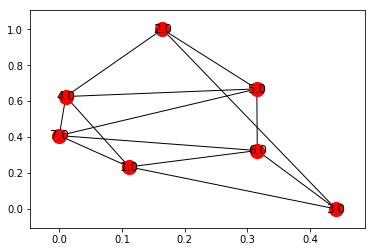

In [52]:
import matplotlib.pyplot as plt

nx.draw_networkx_nodes(G,pos,node_size=200)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()